<h1>Extracting EMG Signals from Multi-Channel LFPs</h1>

<blockquote style="font-size: 12;">
<pre>
This tutorial will show you how to extract EMG signals from your raw lfp data. <br>
</pre>
</blockquote>


In [1]:
import pynapple as nap
from EMGfromLFP import load_neurosuite_xml, EMG_channels, calculate_EMG
import matplotlib.pyplot as plt

<blockquote style="font-size: 12;">
<pre>
Let's start by loading our spike groups.<br>
To load the metadata from your .xml file, we will use the pynapple function <i>load_neurosuite_xml</i>. For our purposes, we will solely extract the spike groups, but note that you can also access the number of channels, sampling rate, and lfp sampling rate. <br>
</pre>
</blockquote>

In [2]:
data_path = '/Users/alissiadimaria/Desktop/20140526_277um_filesToLoad/'
xml = load_neurosuite_xml(data_path)
spike_groups = xml['group_to_channel']
lfpSamplingRate = xml['fs_eeg']

<blockquote style="font-size: 12;">
<pre>
Notice that each spike group represents a shank. Below there are 6 spike groups/shanks, each with their respective contact sites. We will use a subset of these channels to calculate the high frequency correlation between them, which has been shown to be a good proxy for the actual EMG because they are linearly related (Schomburg et al., 2014). <br>
<i>*Channel ordering goes from superficial to deep for each channel/spike group. </i> <br>
</pre>
</blockquote>

In [3]:
spike_groups

{0: array([21, 22, 23, 27, 24, 25, 26, 20]),
 1: array([16, 18, 28, 29, 30, 31, 19, 17]),
 2: array([32, 33, 34, 35, 36, 43, 45, 47]),
 3: array([37, 38, 39, 40, 41, 42, 44, 46]),
 4: array([82, 77, 80, 79, 83, 76, 95, 64]),
 5: array([92, 67, 93, 66, 94, 65, 81, 78])}

In [4]:
lfpSamplingRate

1250

<blockquote style="font-size: 12;">
<pre>
Next, we need to select the relevant channels for EMG extraction from our spike group data. The selected channels are a combination of first and last channels on each shank. <br>
<pre>
</blockquote>

In [5]:
from scipy.io import loadmat 

mat_data = loadmat('/Users/alissiadimaria/Downloads/20140526_277um/20140526_277um.sessionInfo.mat')
badchannels = mat_data['sessionInfo'][0]['badchannels'][0][0]
badchannels = ', '.join(map(str, badchannels))
badchannels = badchannels.split(', ')

badChannels = []
for num in badchannels:
    if num: 
        badChannels.append(int(num))
emgchans = EMG_channels(spike_groups, badChannels)
emgchans

[20, 16, 33, 40, 95, 93]

<blockquote style="font-size: 12;">
<pre>
Now it's time to load the lfp signal. To do so, we will use the pynapple function <i>load_eeg</i>. For this example, we will only use the first 200s of the lfp. <br>
</pre>
</blockquote>

In [6]:
data_path = '/Users/alissiadimaria/Desktop/20140526_277um_filesToLoad/20140526_277um.lfp'
lfp = nap.load_eeg(data_path, channel=emgchans)
time_support = nap.IntervalSet(start=[0], end=[200])
lfp = lfp.restrict(time_support)

In [7]:
print(lfp)

            20    16    33    40    95    93
Time (s)                                    
0.0000    -749  -754  -909  -960  -936  -997
0.0008   -1423 -1508 -1857 -1917 -1838 -2011
0.0016   -1232 -1181 -1426 -1698 -1655 -1796
0.0024   -1320 -1234 -1382 -1564 -1687 -1806
0.0032   -1209 -1156 -1432 -1467 -1717 -1788
...        ...   ...   ...   ...   ...   ...
199.9968  -162  -295  -188  -102  -447  -557
199.9976  -194  -215  -413  -291  -507  -565
199.9984  -356  -323  -648  -526  -607  -777
199.9992  -499  -545  -770  -816  -706  -862
200.0000  -600  -663  -752 -1029  -766  -867

[250001 rows x 6 columns]


<blockquote style="font-size: 12;">

</blockquote>

<blockquote style="font-size: 12;">
<pre>
Finally, let's calculate the EMG signal. Essentially, the function calculates correlations between channels in the 300-600Hz band using 0.5-second sliding windows. Mean pairwise correlations are computed for each time point. <br>

From here, you will be able to compute the histogram of the EMG signal to further divide the data into REM and WAKE epochs. <br>
*High EMG for WAKE <br>
*Low EMG for REM <br>
</pre>
</blockquote>

In [8]:
EMG = calculate_EMG(lfp, emgchans, lfpSamplingRate)
print(EMG) 

              Data
Time (s)          
625.0     0.184925
1250.0    0.075529
1875.0    0.075306
2500.0    0.054248
3125.0    0.059689
...            ...
246875.0  0.698522
247500.0  0.811288
248125.0  0.817571
248750.0  0.735256
249375.0  0.610977

[399 rows x 1 columns]


<blockquote style="font-size: 12;">
<pre>
Let's plot it! <br>
</pre>
</blockquote>

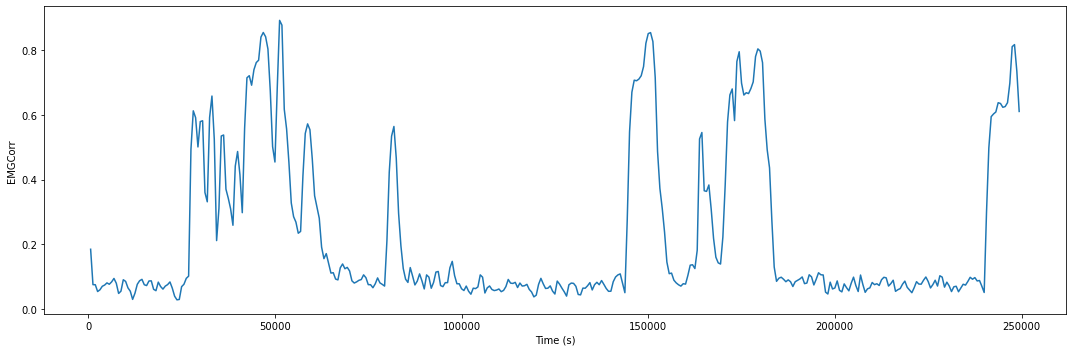

In [10]:
plt.figure(figsize=(15,5))
plt.plot(EMG)
plt.xlabel("Time (s)")
plt.ylabel("EMGCorr")

plt.tight_layout()
plt.show()